# Question 1

Student IDs:
* Lisa Moleins : 
* Mathys Wattine :
* Francois Chevalier : 86084

Import Librairies and Dataset

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('AmesHousing.csv')

Step 1 : Explore Dataset and Data Cleaning

In [2]:
print(df.shape)
print(df.columns)

(2930, 82)
Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr B

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [4]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


Here we exhibit all the variables that contains NA values, we have the following observations:
* one numerical countains missing values : fill na with mean/ median according to the distribution shape
* some variables countain a lot of missing values : delete them
* some variables have just a few number of missing values : delete the rows with NA values
* some categorial variables have some missing values : fillna with the mode

In [5]:
columns_with_missing_values = []
print('Columns with missing values: # of missing values')
for i in df.columns:
    if df[i].isnull().any():
        columns_with_missing_values.append(i)
        print(i + ': ', df[i].isnull().sum())

Columns with missing values: # of missing values
Lot Frontage:  490
Alley:  2732
Mas Vnr Type:  1775
Mas Vnr Area:  23
Bsmt Qual:  80
Bsmt Cond:  80
Bsmt Exposure:  83
BsmtFin Type 1:  80
BsmtFin SF 1:  1
BsmtFin Type 2:  81
BsmtFin SF 2:  1
Bsmt Unf SF:  1
Total Bsmt SF:  1
Electrical:  1
Bsmt Full Bath:  2
Bsmt Half Bath:  2
Fireplace Qu:  1422
Garage Type:  157
Garage Yr Blt:  159
Garage Finish:  159
Garage Cars:  1
Garage Area:  1
Garage Qual:  159
Garage Cond:  159
Pool QC:  2917
Fence:  2358
Misc Feature:  2824


Delete useless data before visualising dataset structure

In [6]:
df = df.drop(['PID', 'Order'], axis=1) 
df = df.drop(['Alley', 'Pool QC', 'Fence', 'Misc Feature'], axis=1) # drop columns with too many missing values

ATTENTION : Cellulle suivante
dans la premiere etape ou jai fait l'analyse j'ai vu qu'il y avait les variables suivantes qui sont linked a des variables plus importantes (par exemple prennnent NA quand le garage area est 0 tout simplement pcq il n'y a pas de garage). 
Je pense qu'il est bien de les enlever pour pas encombrer le modele de donnees inutiles
En incluant la cellule qui suit j'ai un R2 out sample de 0.89 pour la simple linear regression, je n'ai pas teste sans

Delete categorial variables that takes NA when they are linked to an important variable that takes 0 as value

In [7]:
# df = df.drop(['Mas Vnr Type', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cond', 'Garage Qual'], axis=1)

Lets Visualise the distribution od all numerical variables

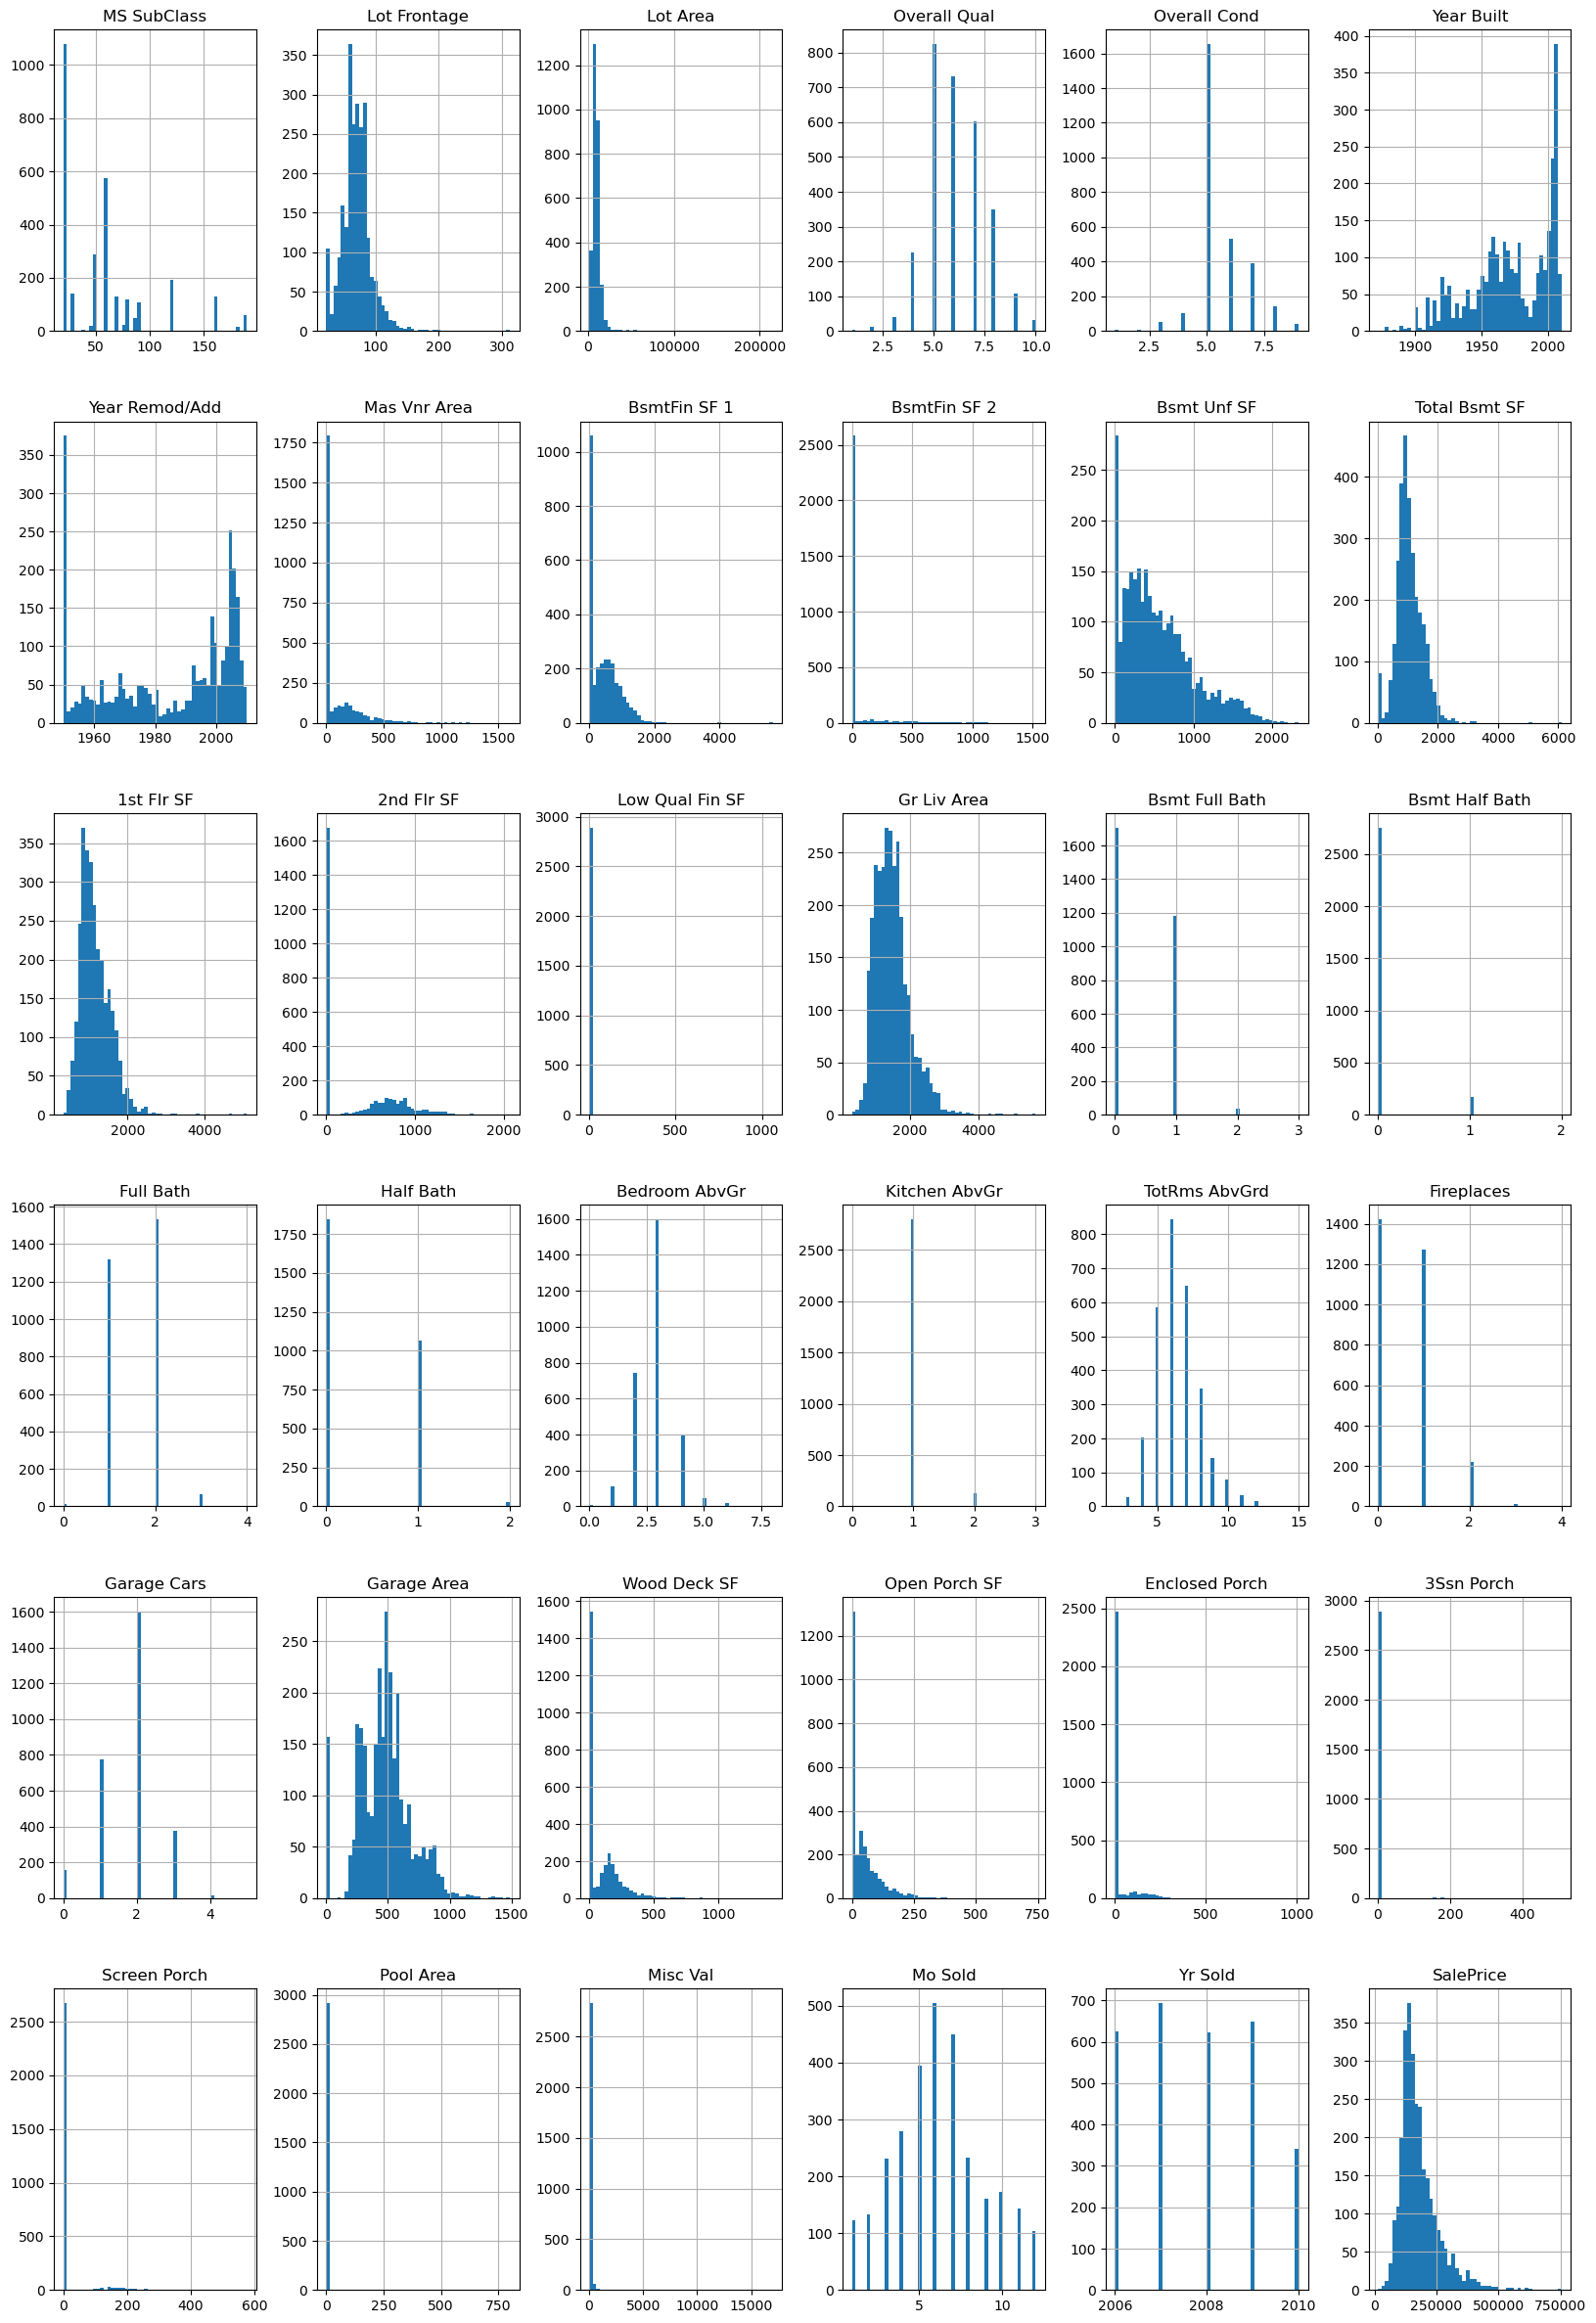

In [8]:
df.hist(figsize=(20, 30), bins=50)
plt.show()

Delete rows of the dataframe when there are low Na values (<= 25)

In [10]:
df = df.dropna(subset=['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area'])

Compute the correlation matrix

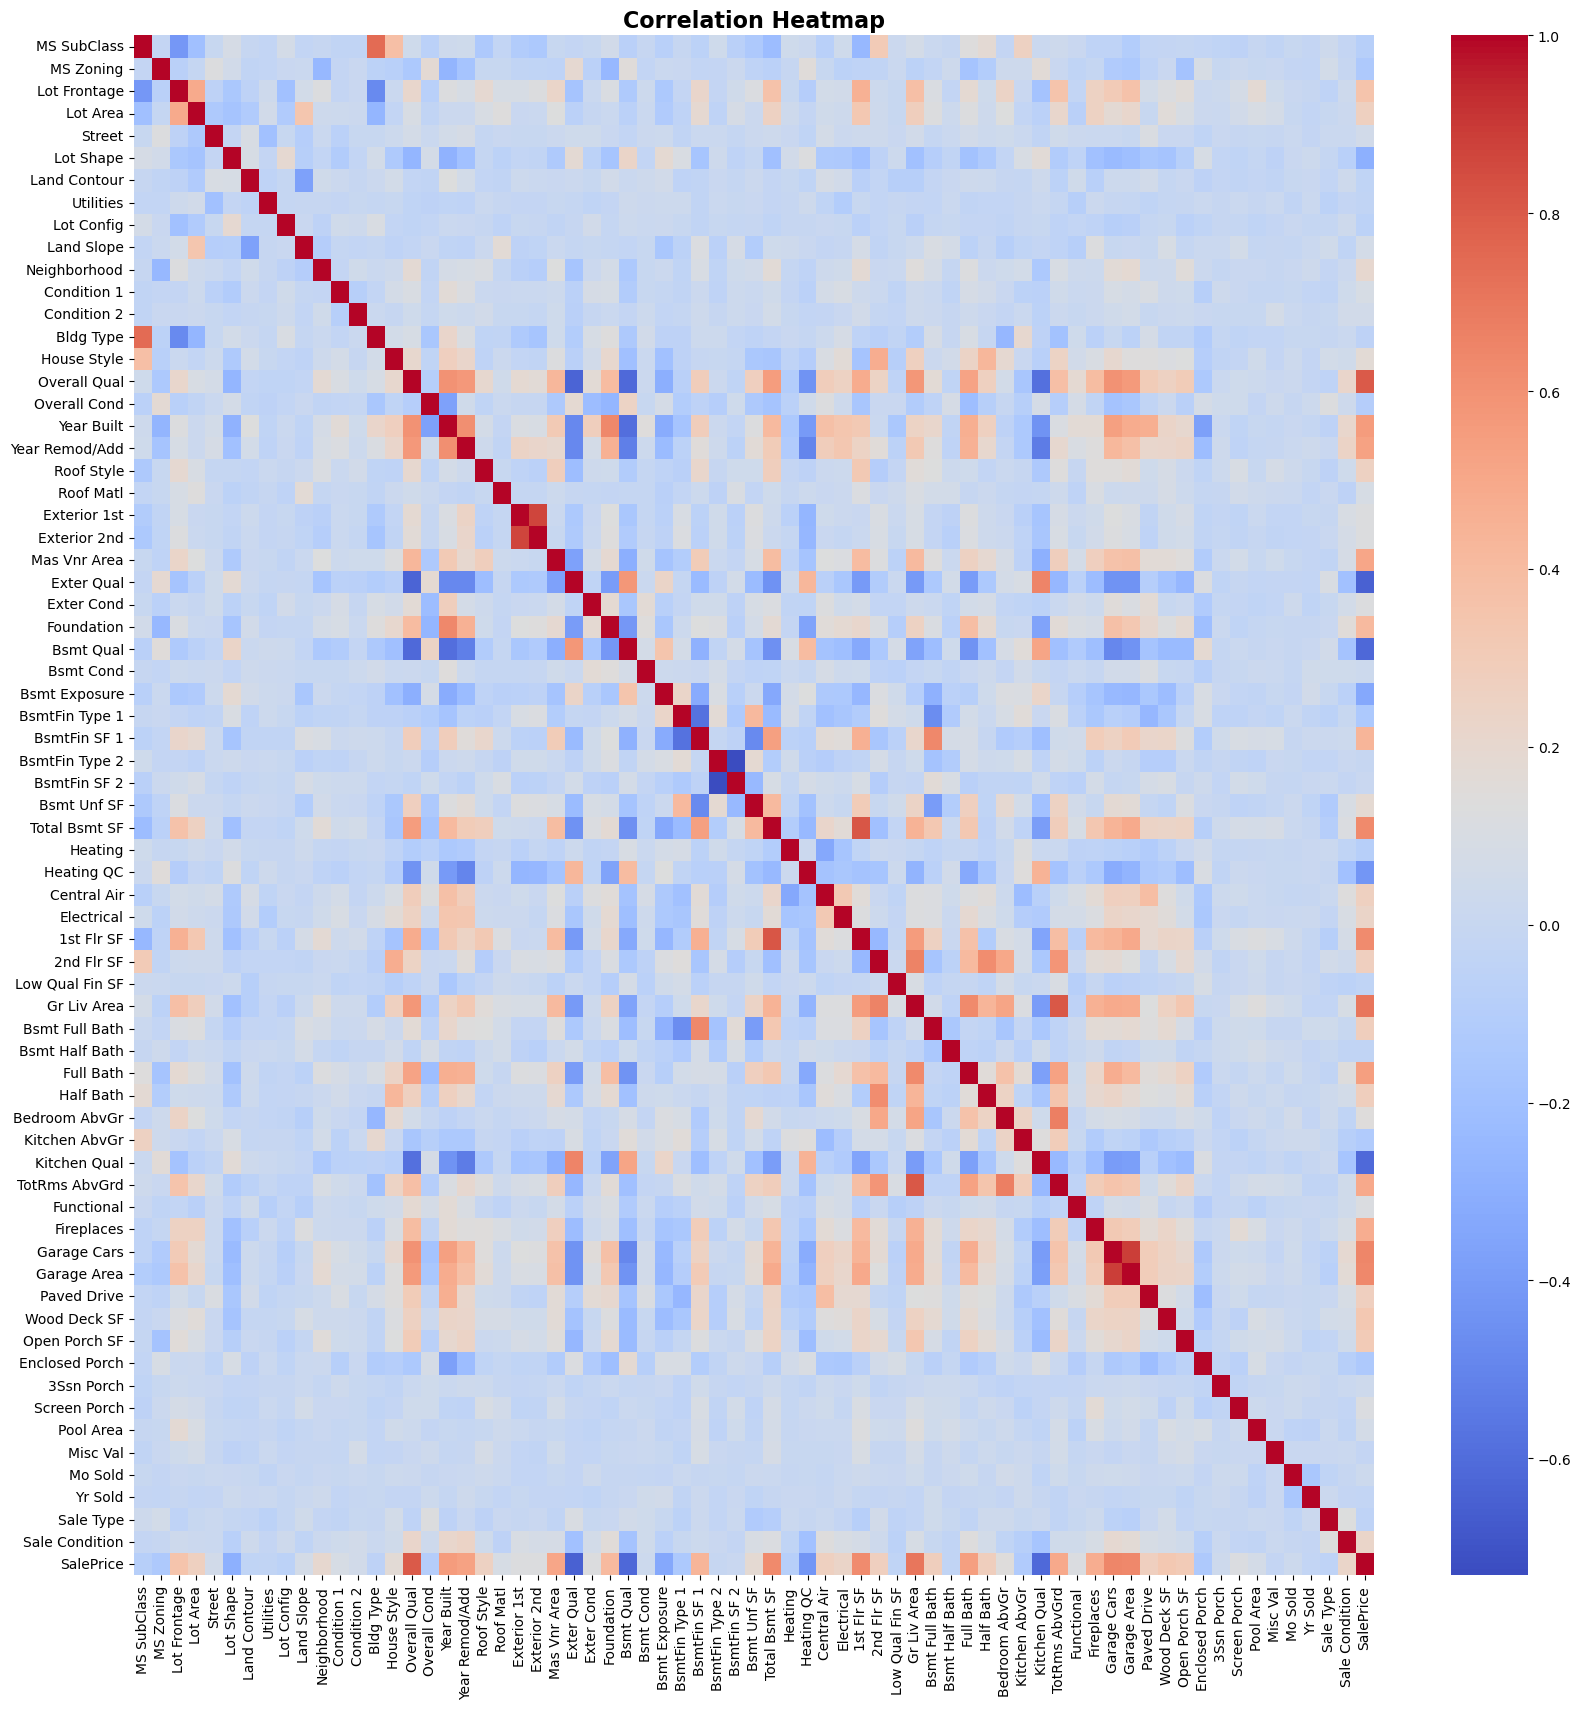

In [11]:
df_object = df.select_dtypes(include='object')
for i in df_object.columns:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])
    
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap', weight='bold', fontsize=16)
plt.show()

Given the string importance of the Gr Liv Area Variable, lets visualise the scatter plot with the sale price

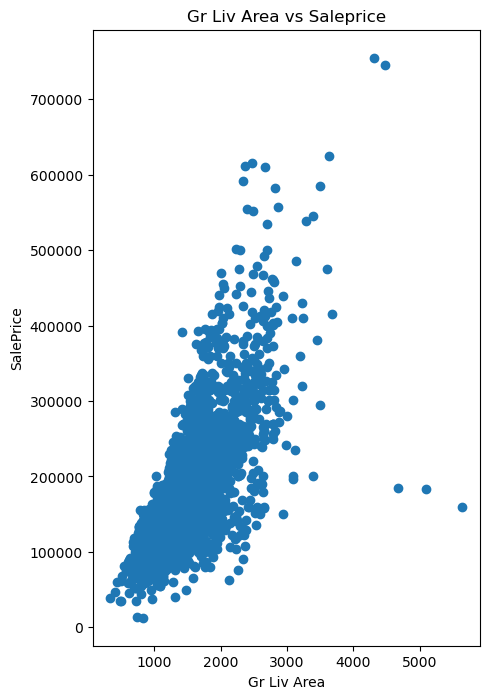

In [12]:
plt.figure(figsize=(5,8))
plt.scatter(df['Gr Liv Area'], df['SalePrice'])
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.title('Gr Liv Area vs Saleprice')
plt.show()

Thanks to the scatter plot, we observe some outliers: some large houses have been sold cheaply. >We decide to drop all the houses with a Gr Liv Area > 4000

In [13]:
df = df[df['Gr Liv Area'] < 4000]

We fill NA values

In [14]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].median())
df['Bsmt Qual'] = df['Bsmt Qual'].fillna(df['Bsmt Qual'].mode()[0])
df['Bsmt Cond'] = df['Bsmt Cond'].fillna(df['Bsmt Cond'].mode()[0])
df['Bsmt Exposure'] = df['Bsmt Exposure'].fillna(df['Bsmt Exposure'].mode()[0])
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].fillna(df['BsmtFin Type 1'].mode()[0])
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].fillna(df['BsmtFin Type 2'].mode()[0])

Standardization : Thanks to the distribution map for numerical variables, we chose to adopt the following scalar methods according to the shape of the distribution

In [15]:
df['Overall Qual'] = MinMaxScaler().fit_transform(df['Overall Qual'].values.reshape(-1, 1))
df['Overall Cond'] = MinMaxScaler().fit_transform(df['Overall Cond'].values.reshape(-1, 1))
df['Mo Sold'] = MinMaxScaler().fit_transform(df['Mo Sold'].values.reshape(-1, 1))
df['Yr Sold'] = MinMaxScaler().fit_transform(df['Yr Sold'].values.reshape(-1, 1))
df['Garage Cars'] = MinMaxScaler().fit_transform(df['Garage Cars'].values.reshape(-1, 1))
df['Fireplaces'] = MinMaxScaler().fit_transform(df['Fireplaces'].values.reshape(-1, 1))
df['TotRms AbvGrd'] = MinMaxScaler().fit_transform(df['TotRms AbvGrd'].values.reshape(-1, 1))
df['Full Bath'] = MinMaxScaler().fit_transform(df['Full Bath'].values.reshape(-1, 1))
df['Half Bath'] = MinMaxScaler().fit_transform(df['Half Bath'].values.reshape(-1, 1))
df['Bedroom AbvGr'] = MinMaxScaler().fit_transform(df['Bedroom AbvGr'].values.reshape(-1, 1))
df['Kitchen AbvGr'] = MinMaxScaler().fit_transform(df['Kitchen AbvGr'].values.reshape(-1, 1))
df['MS SubClass'] = MinMaxScaler().fit_transform(df['MS SubClass'].values.reshape(-1, 1))

In [16]:
df['SalePrice'] = StandardScaler().fit_transform(df['SalePrice'].values.reshape(-1, 1)) 
df['Gr Liv Area'] = StandardScaler().fit_transform(df['Gr Liv Area'].values.reshape(-1, 1))
df['1st Flr SF'] = StandardScaler().fit_transform(df['1st Flr SF'].values.reshape(-1, 1))

In [17]:
df['Lot Frontage'] = RobustScaler().fit_transform(df['Lot Frontage'].values.reshape(-1, 1))
df['Lot Area'] = RobustScaler().fit_transform(df['Lot Area'].values.reshape(-1, 1))
df['Year Built'] = RobustScaler().fit_transform(df['Year Built'].values.reshape(-1, 1))
df['Year Remod/Add'] = RobustScaler().fit_transform(df['Year Remod/Add'].values.reshape(-1, 1))
df['Mas Vnr Area'] = RobustScaler().fit_transform(df['Mas Vnr Area'].values.reshape(-1, 1))
df['BsmtFin SF 1'] = RobustScaler().fit_transform(df['BsmtFin SF 1'].values.reshape(-1, 1))
df['BsmtFin SF 2'] = RobustScaler().fit_transform(df['BsmtFin SF 2'].values.reshape(-1, 1))
df['Bsmt Unf SF'] = RobustScaler().fit_transform(df['Bsmt Unf SF'].values.reshape(-1, 1))
df['2nd Flr SF'] = RobustScaler().fit_transform(df['2nd Flr SF'].values.reshape(-1, 1))
df['Low Qual Fin SF'] = RobustScaler().fit_transform(df['Low Qual Fin SF'].values.reshape(-1, 1))
df['Garage Area'] = RobustScaler().fit_transform(df['Garage Area'].values.reshape(-1, 1))
df['Wood Deck SF'] = RobustScaler().fit_transform(df['Wood Deck SF'].values.reshape(-1, 1)) 
df['Open Porch SF'] = RobustScaler().fit_transform(df['Open Porch SF'].values.reshape(-1, 1))
df['Enclosed Porch'] = RobustScaler().fit_transform(df['Enclosed Porch'].values.reshape(-1, 1))
df['3Ssn Porch'] = RobustScaler().fit_transform(df['3Ssn Porch'].values.reshape(-1, 1))
df['Screen Porch'] = RobustScaler().fit_transform(df['Screen Porch'].values.reshape(-1, 1))
df['Pool Area'] = RobustScaler().fit_transform(df['Pool Area'].values.reshape(-1, 1))
df['Misc Val'] = RobustScaler().fit_transform(df['Misc Val'].values.reshape(-1, 1))

Step 2 : Simple Linear Regression

In [18]:
X = df
X = X.drop(['SalePrice'], axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state = 999)

In [19]:
lm = LinearRegression()

In [20]:
# Fit to the training data
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = lm.predict(X_train)

In Sample Analysis

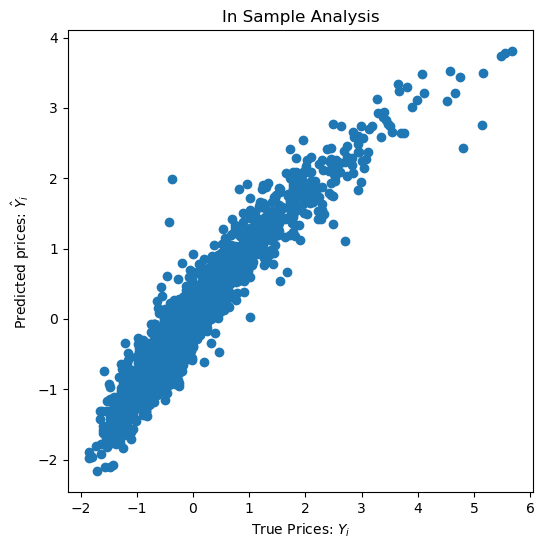

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(y_train, y_pred)
plt.xlabel("True Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title('In Sample Analysis')
plt.show()

In [35]:
y_pred = lm.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, y_pred)))
print(r2_score(y_train, y_pred))

0.3052287747896667
0.9051339531317909


Out of Sample Analysis

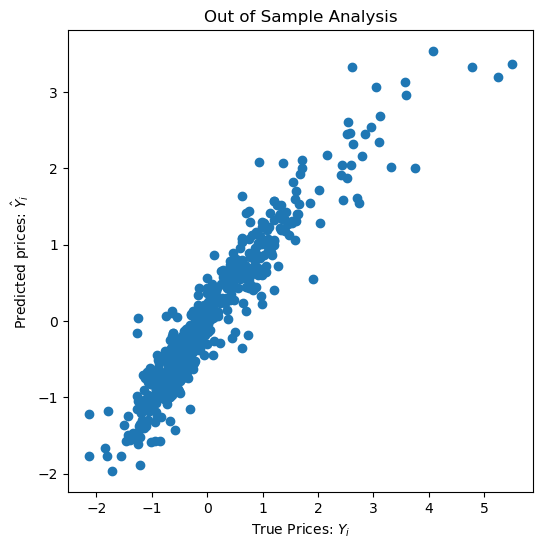

In [25]:
y_pred = lm.predict(X_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("True Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title('Out of Sample Analysis')
plt.show()

In [37]:
y_pred = lm.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

0.34312079827335074
0.8900865619028853
